In [21]:
from __future__ import print_function, division

import os
import operator
import functools
import copy
import time
import glob
print("Running on ", time.asctime())

import numpy as np
import tables as tb
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import invisible_cities.database.load_db as DB
import invisible_cities.core.system_of_units_c as SystemOfUnits
import invisible_cities.reco.peak_functions_c as cpf
import invisible_cities.sierpe.blr as BLR
import invisible_cities.reco.pmaps_functions as pmapf
import invisible_cities.core.fit_functions as fitf

DataPMT = DB.DataPMT()
DataSiPM = DB.DataSiPM()
units = SystemOfUnits.SystemOfUnits()
pi = np.pi

Running on  Wed Mar 29 10:21:00 2017


In [31]:
plt.rcParams["figure.figsize"] = 12, 10

In [22]:
h5f.close()

In [23]:
h5f = tb.open_file("/Users/Gonzalo/github/NEXTdata/Kr2016/data/3389/rwf/dst_waves.gdcsnext.000_3389.root.h5")

In [24]:
rwf = h5f.root.RD.pmtrwf
blr = h5f.root.RD.pmtblr
cal = np.abs(DataPMT.adc_to_pes.values)

0


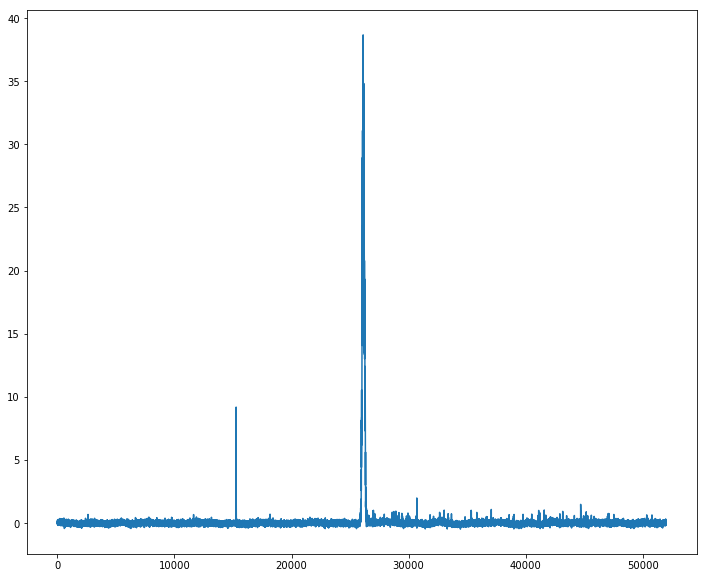

1


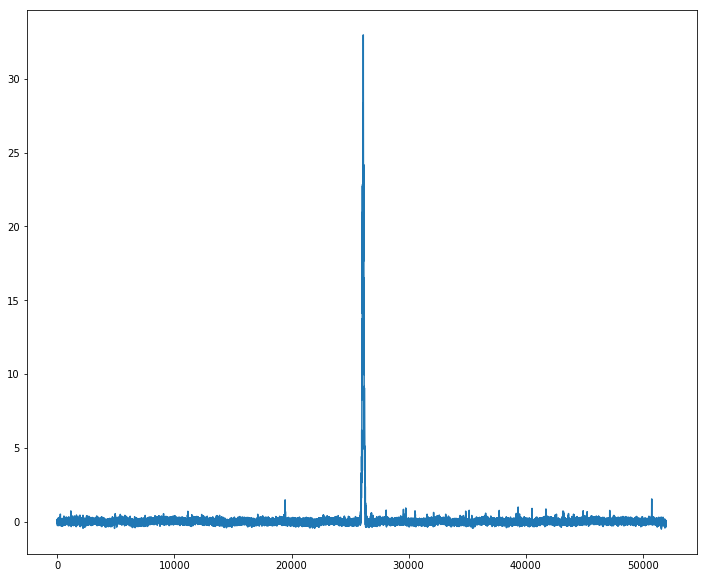

2


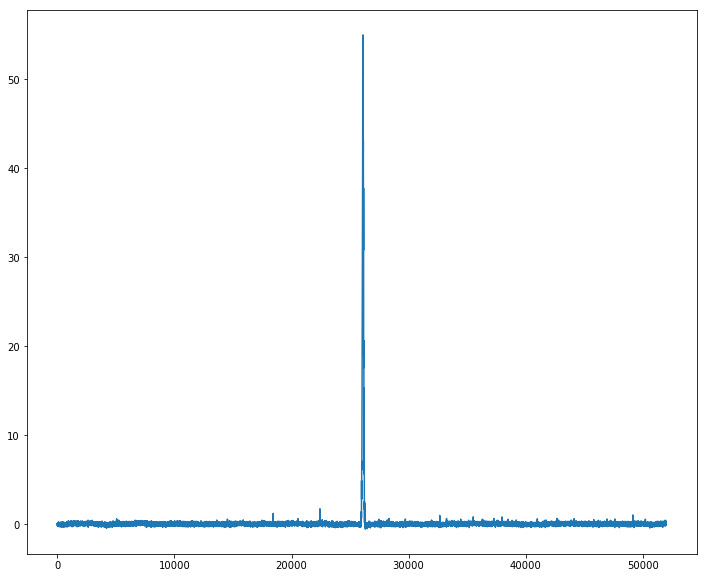

3


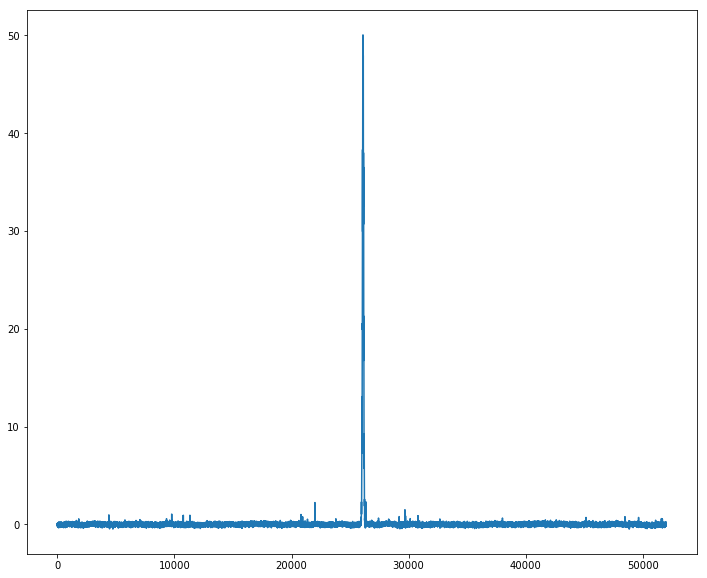

4


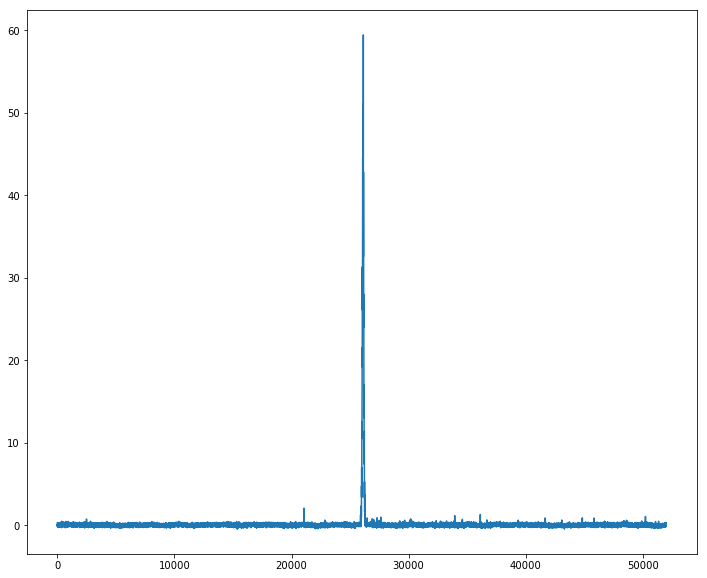

5


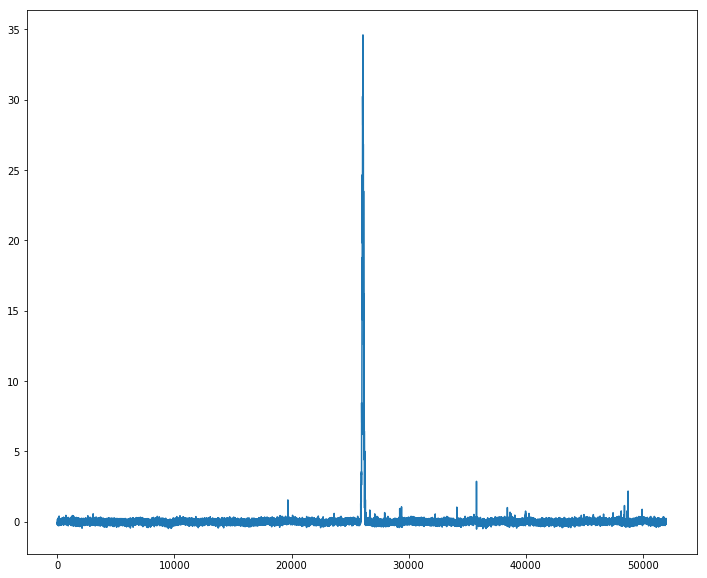

6


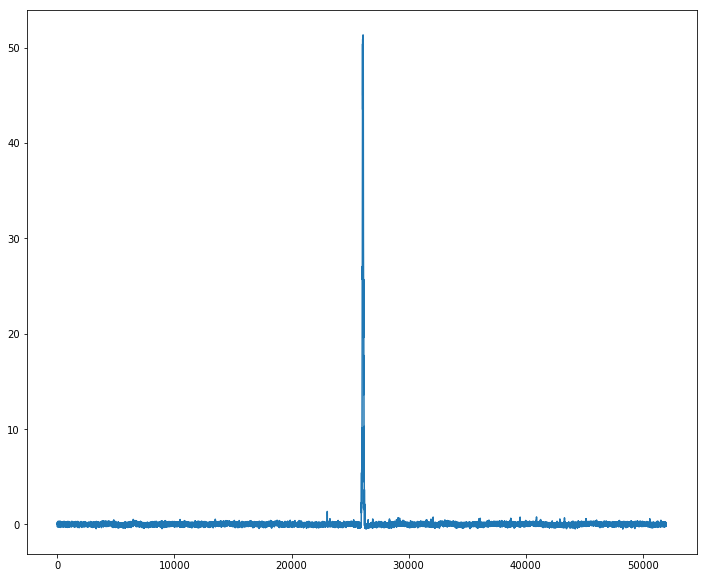

7


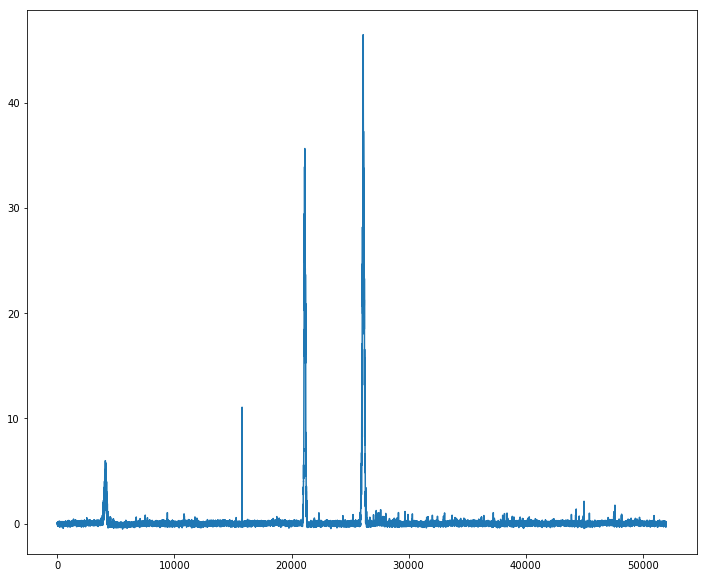

8


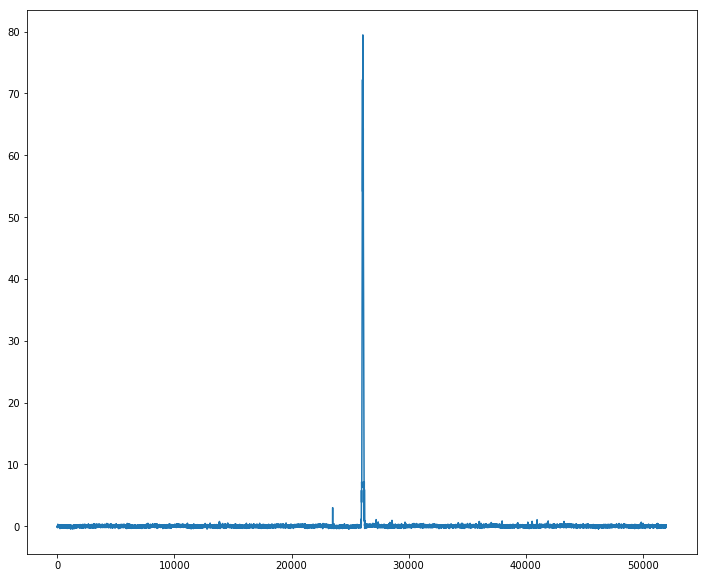

9


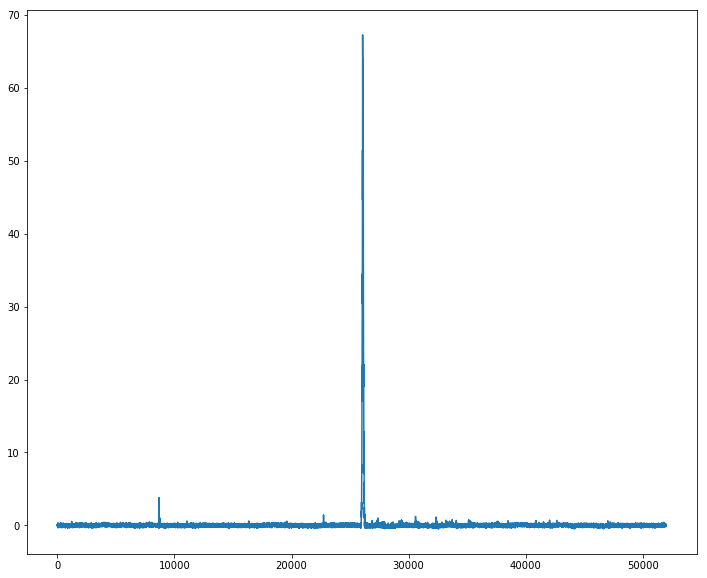

10


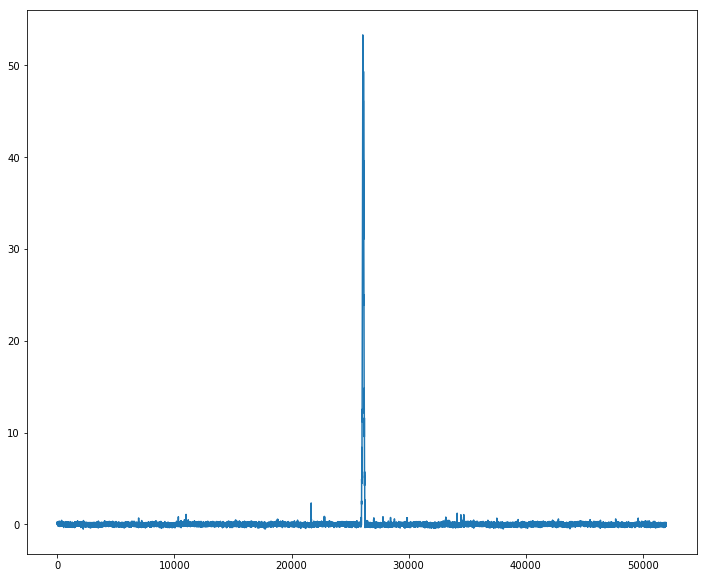

11


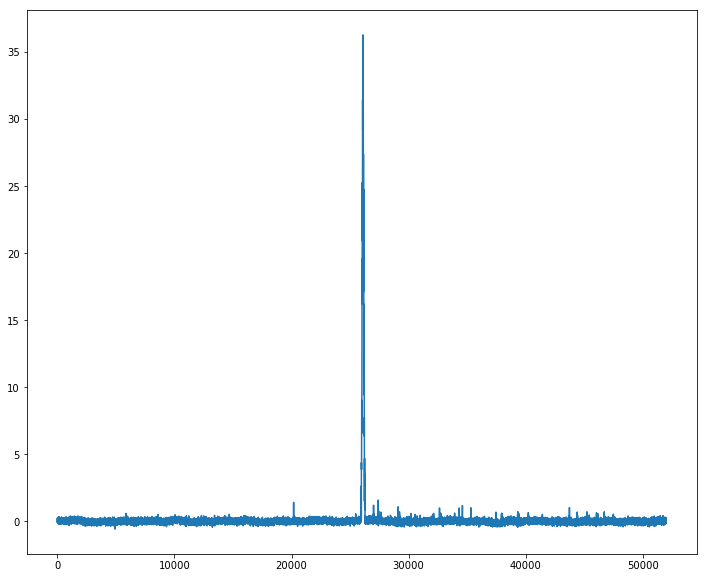

12


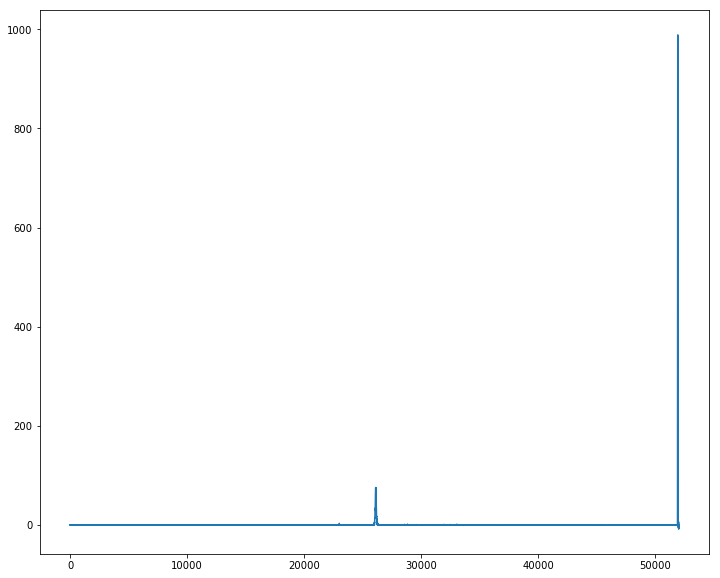

13


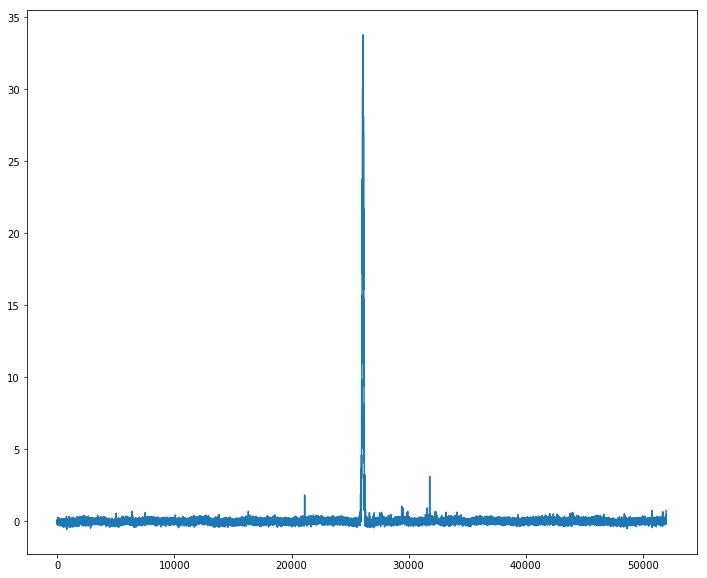

14


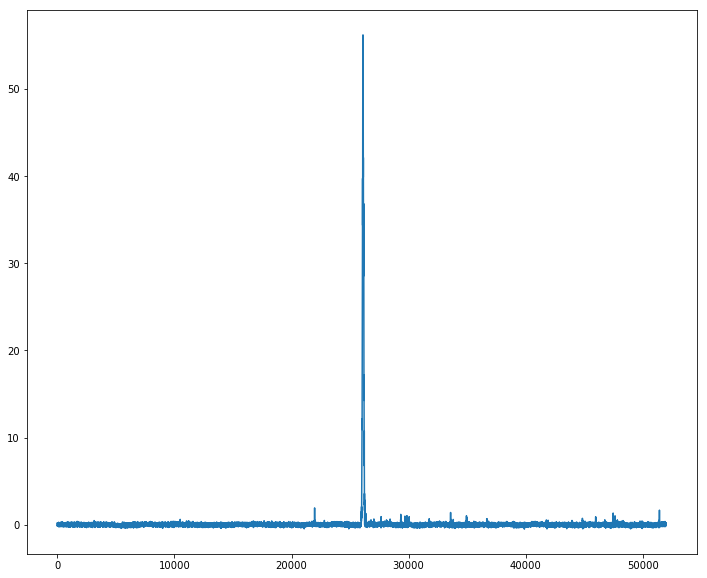

15


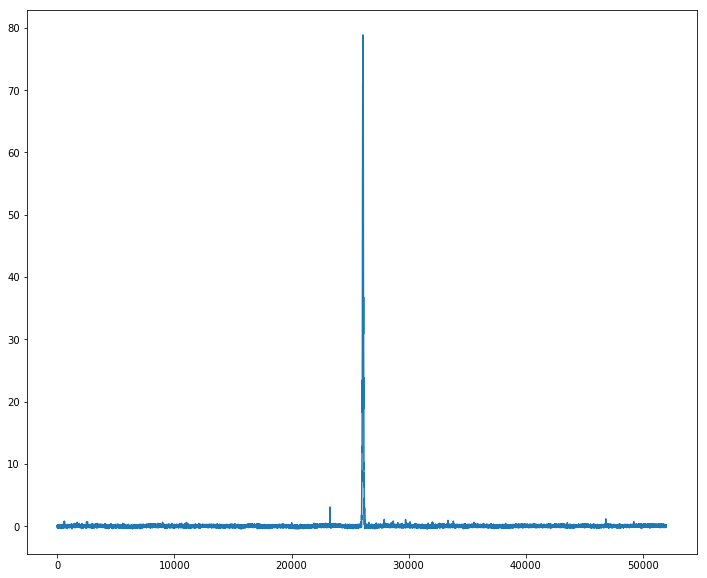

16


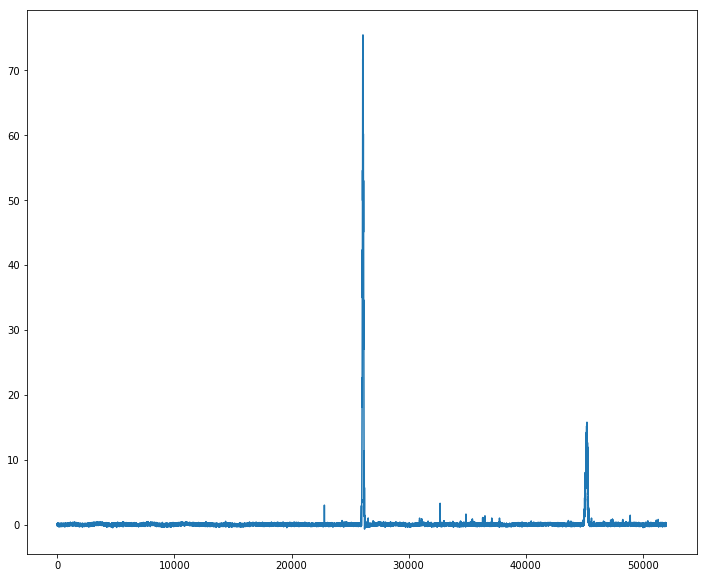

17


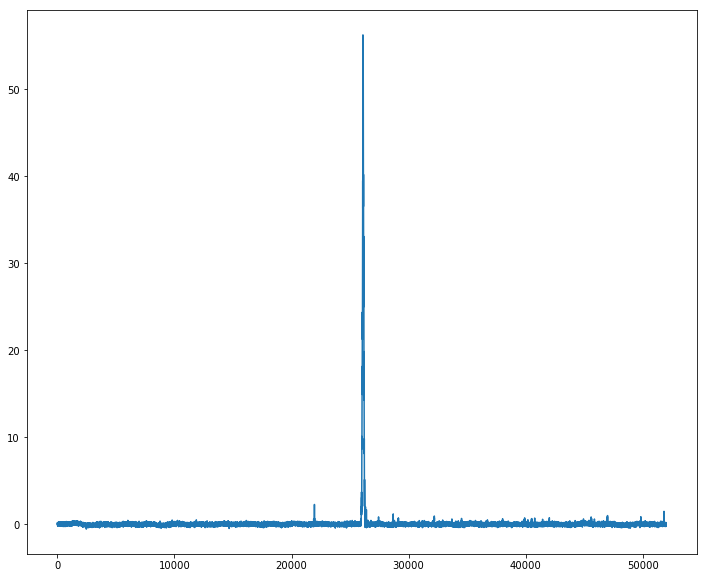

18


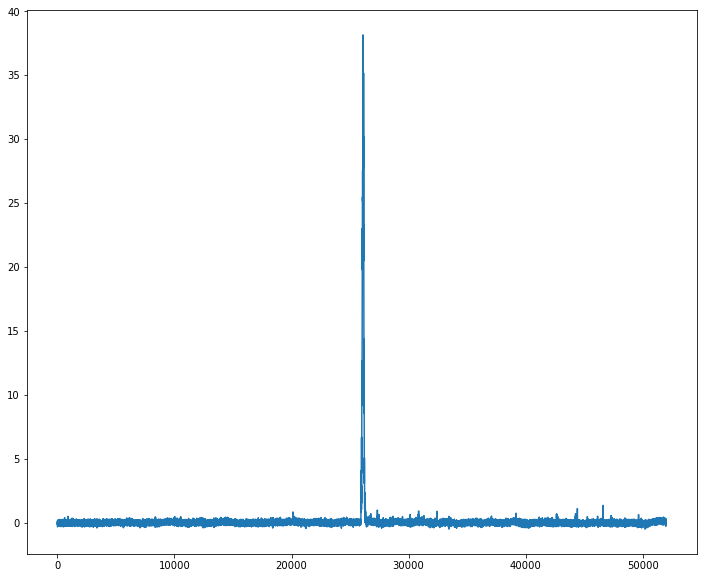

19


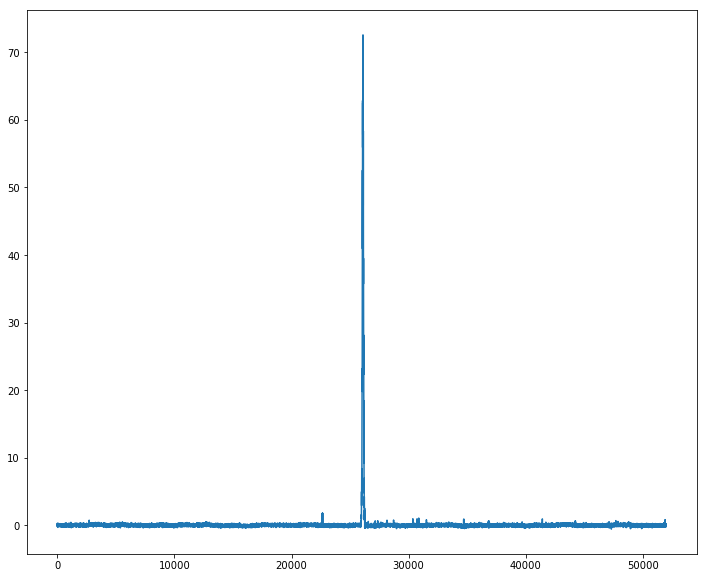

20


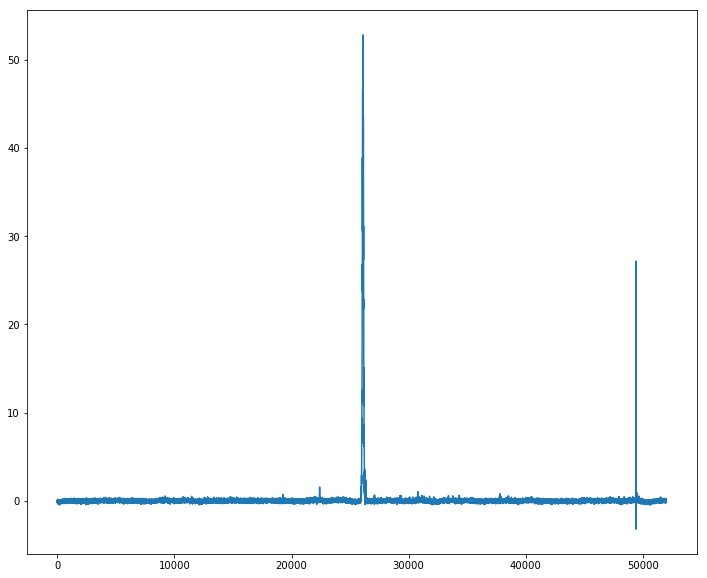

21


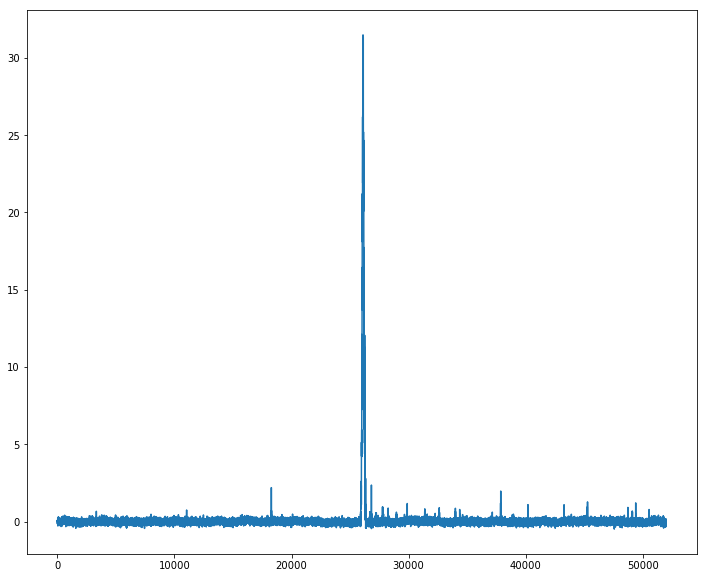

22


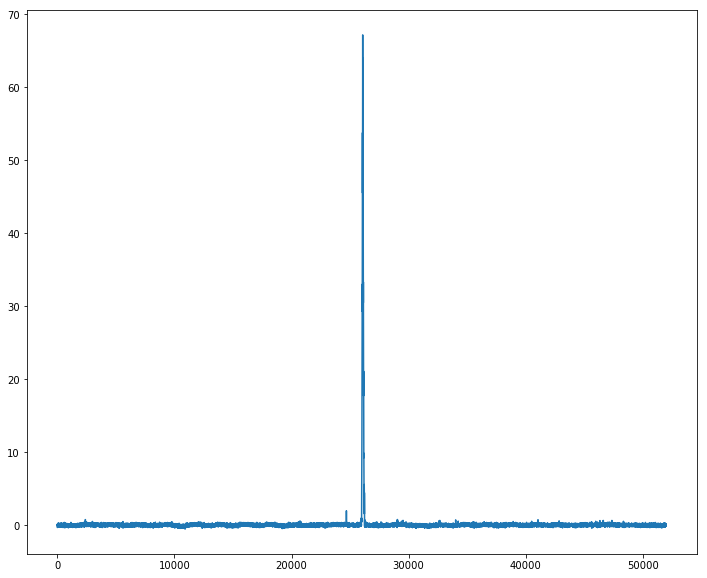

23


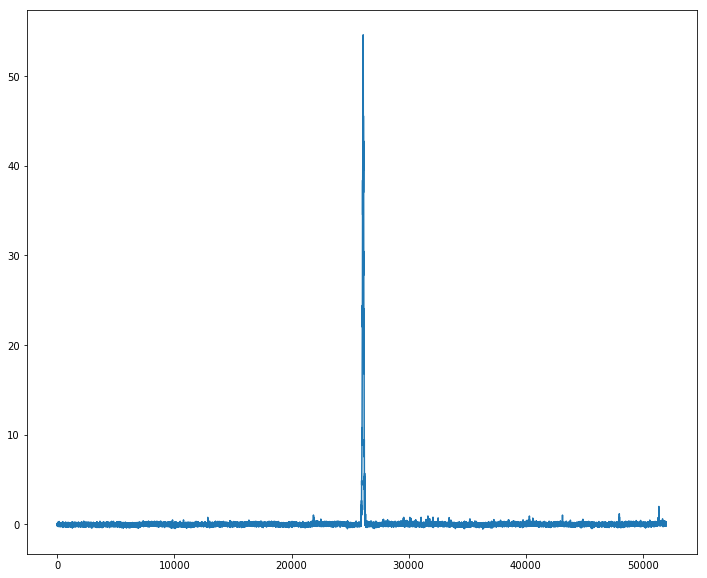

24


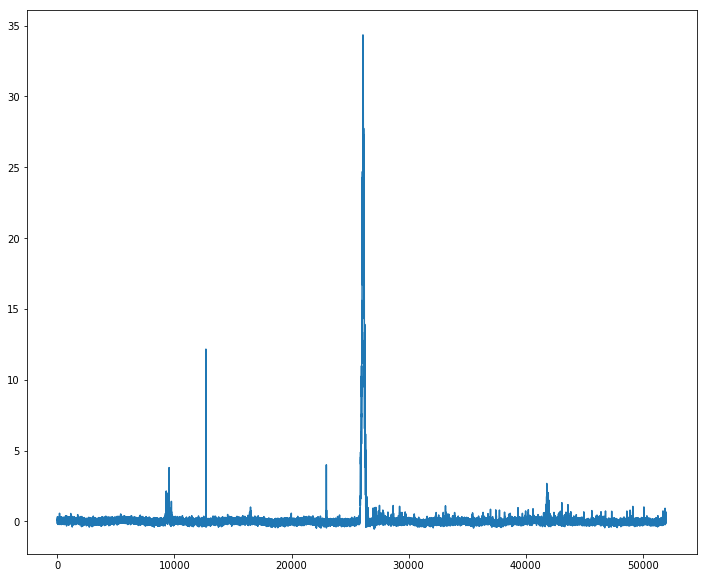

25


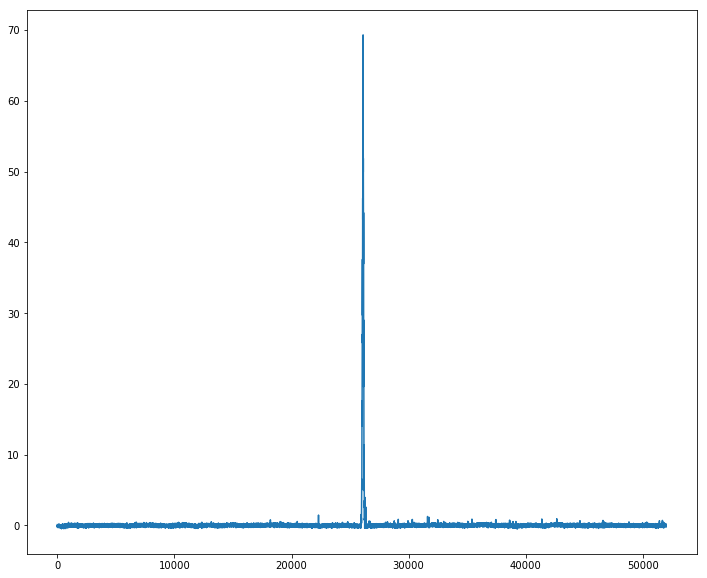

26


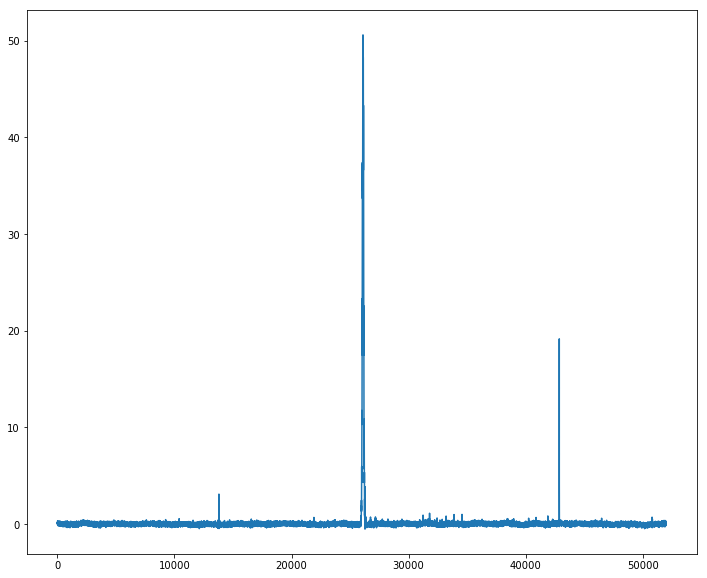

27


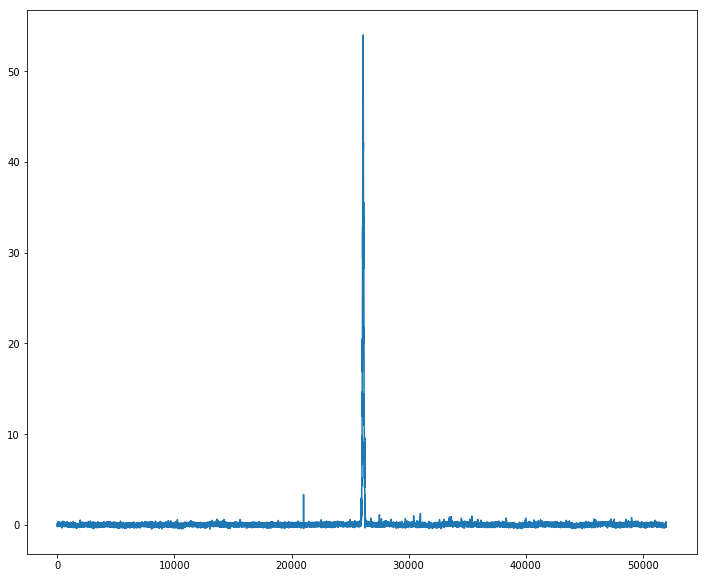

28


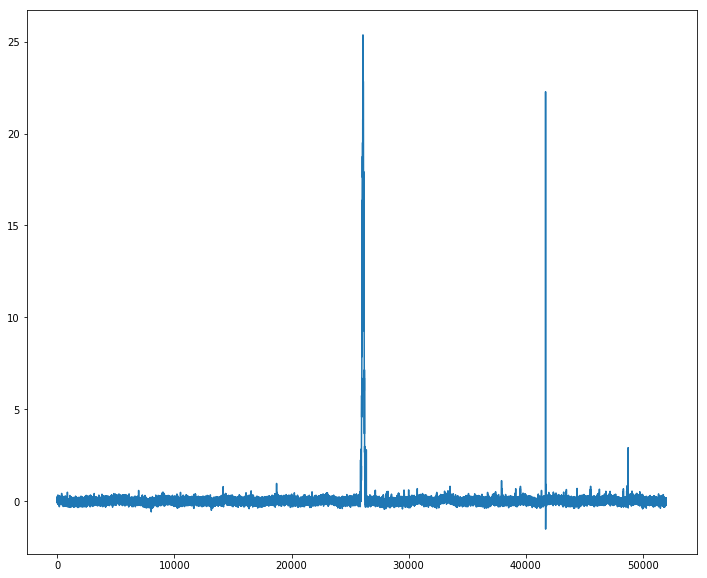

29


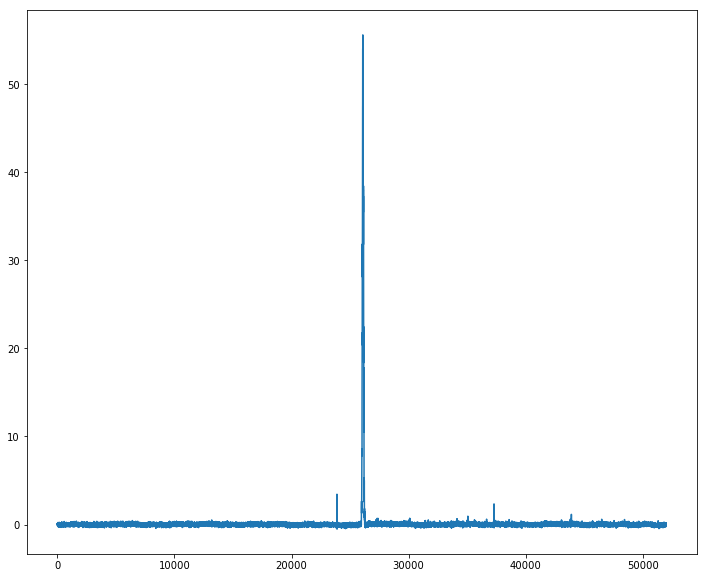

30


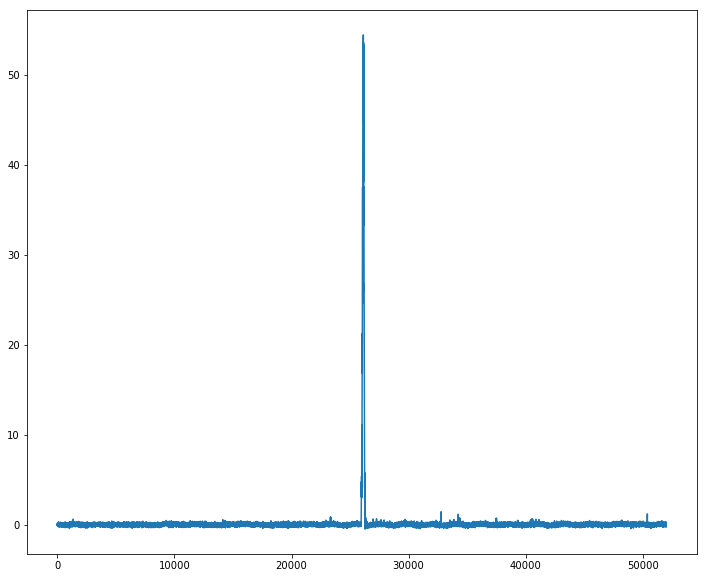

31


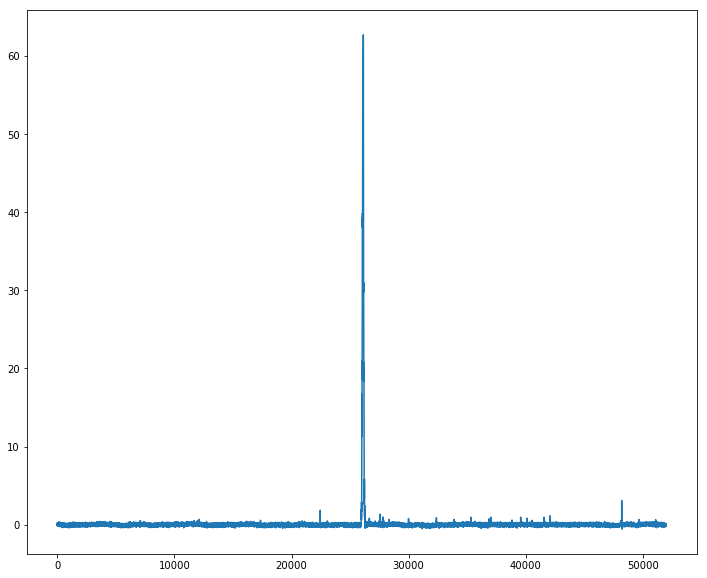

32


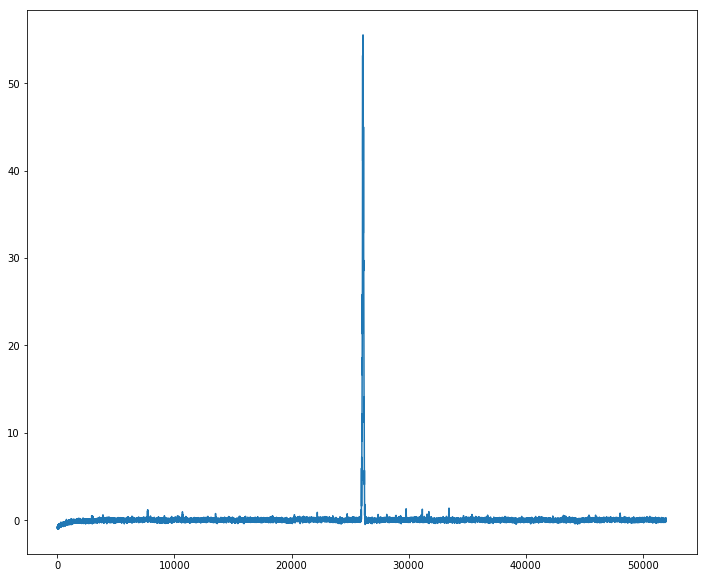

33


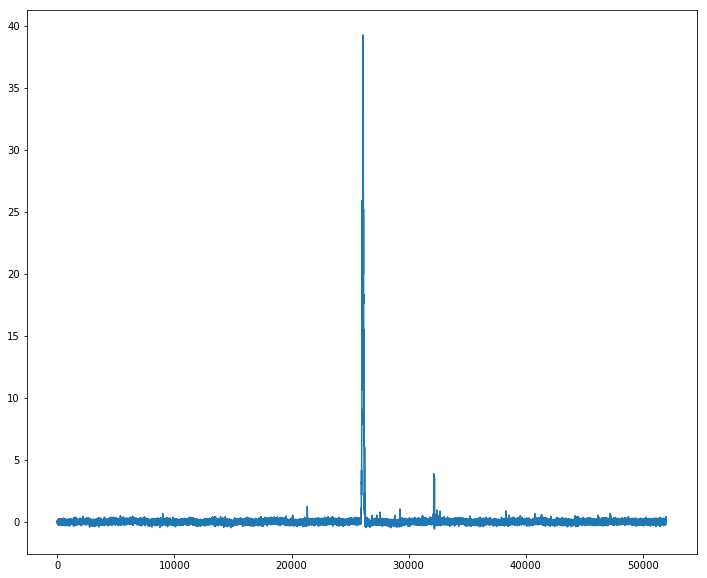

34


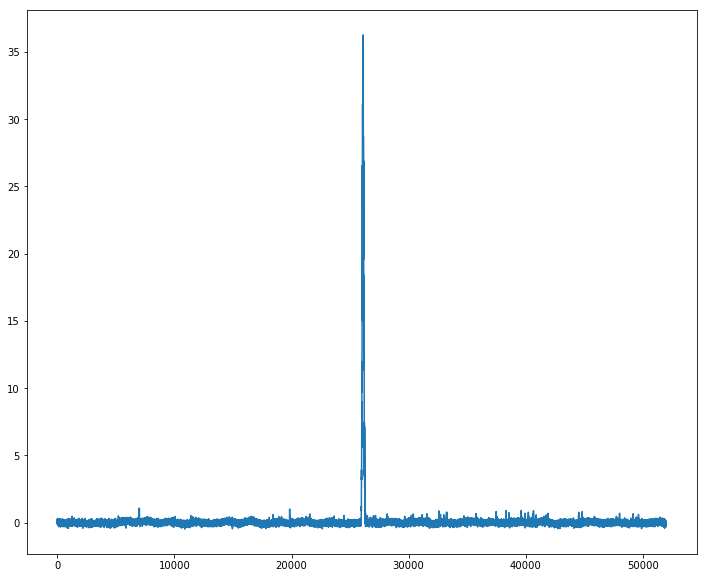

35


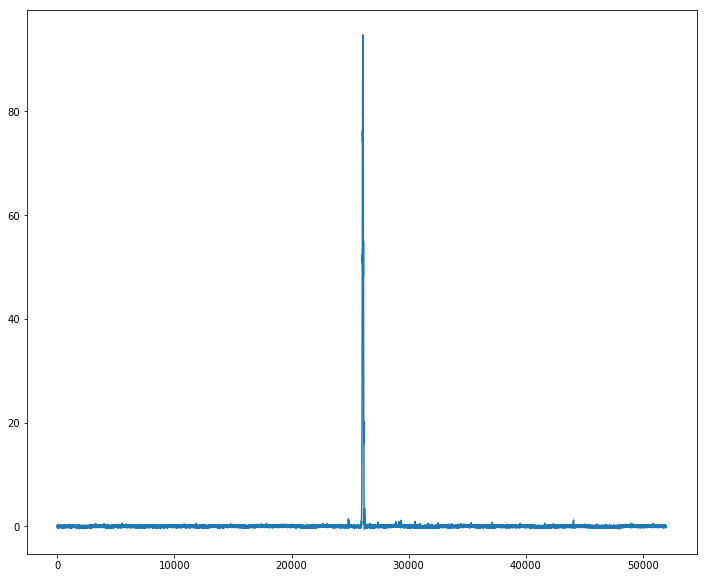

36


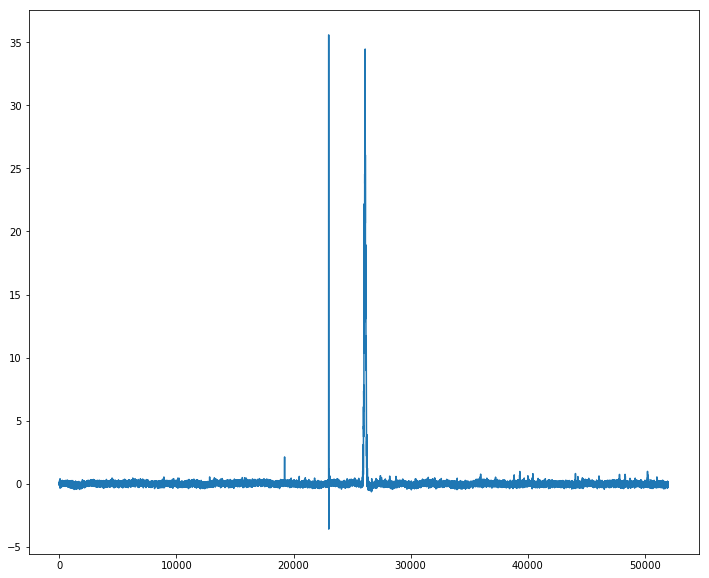

37


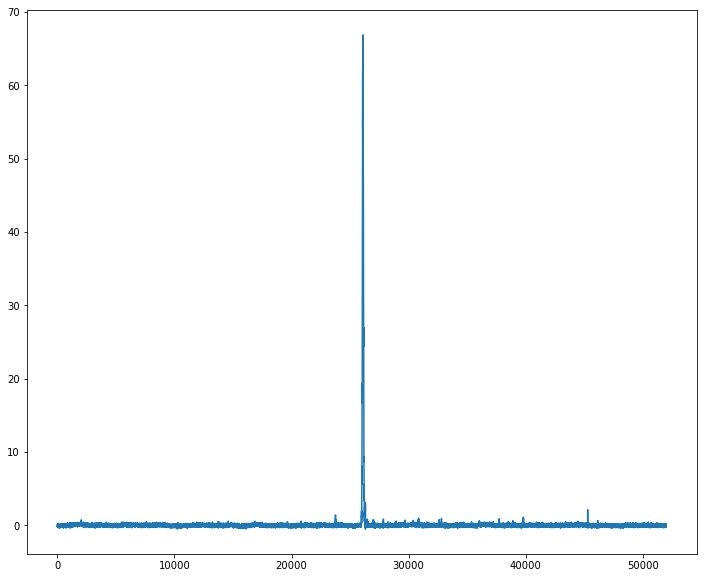

38


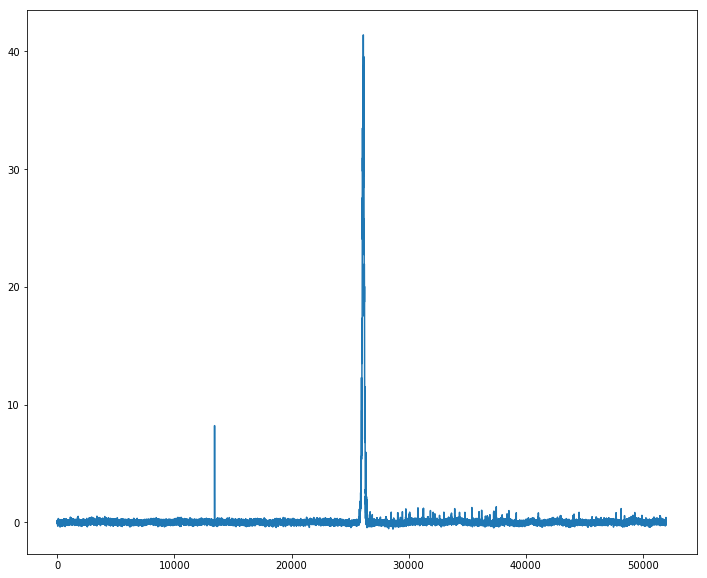

39


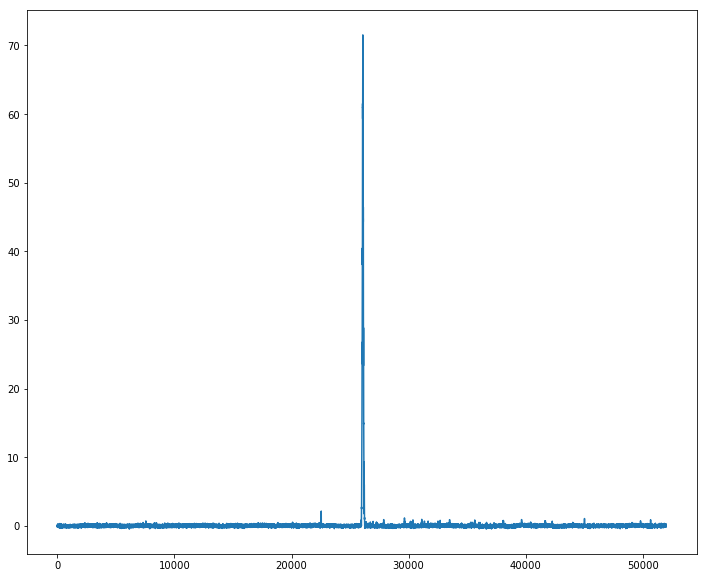

40


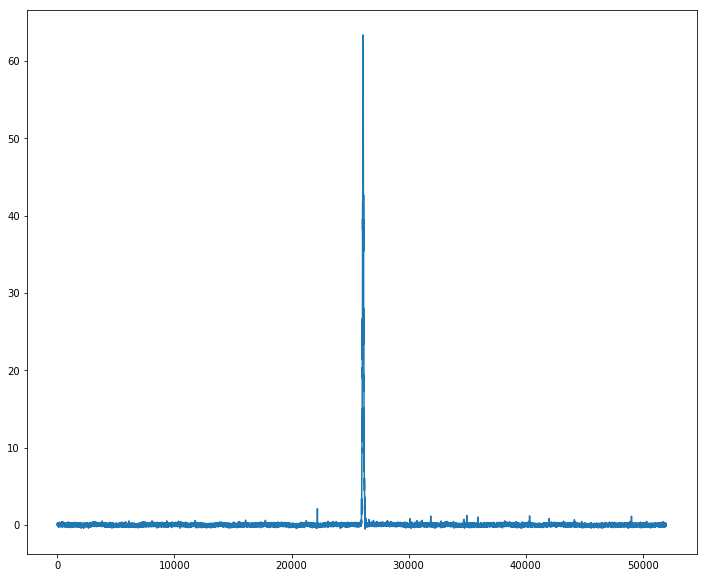

41


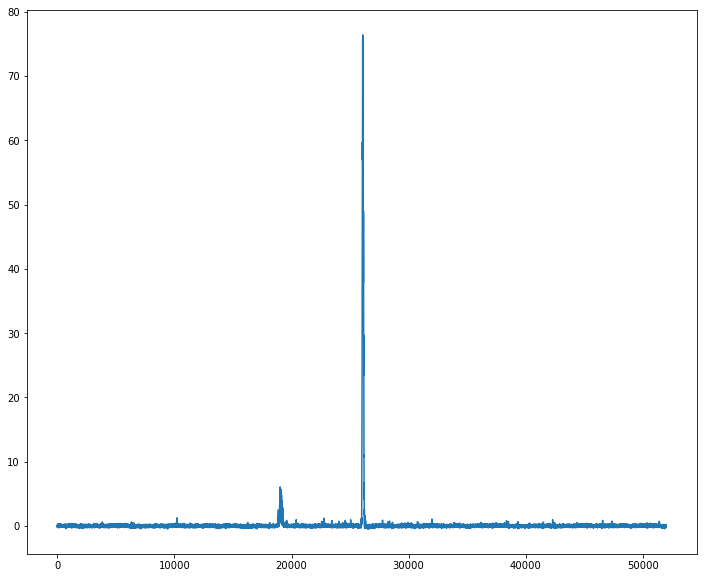

42


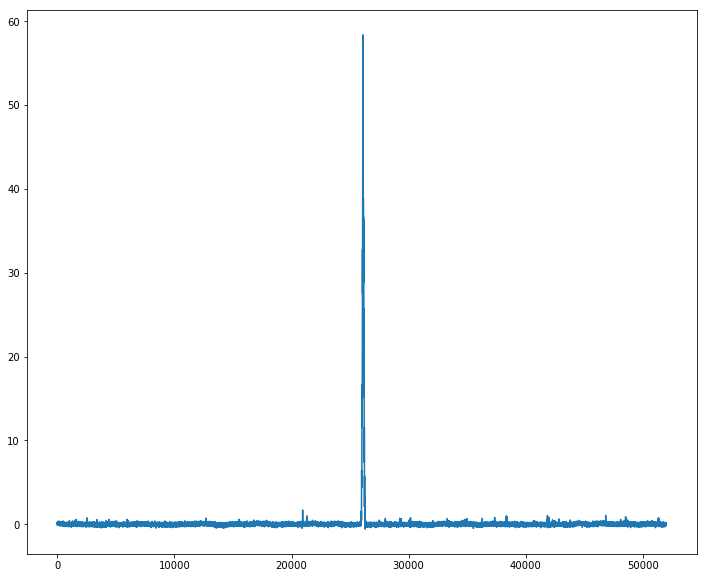

43


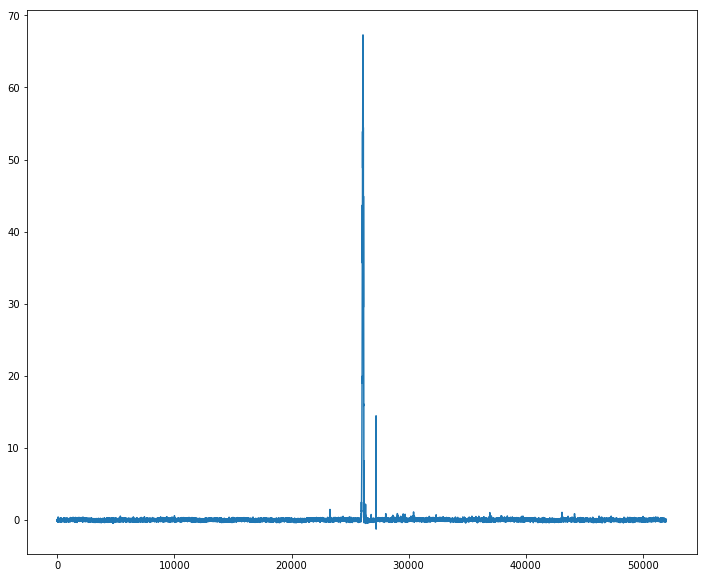

44


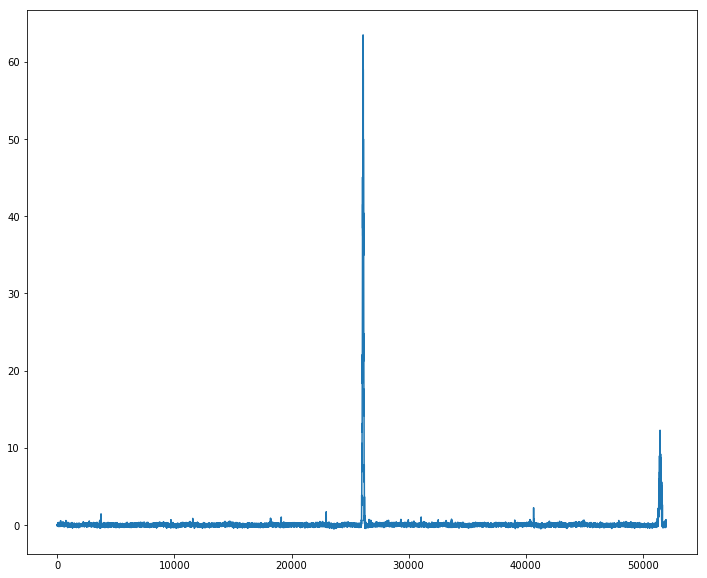

45


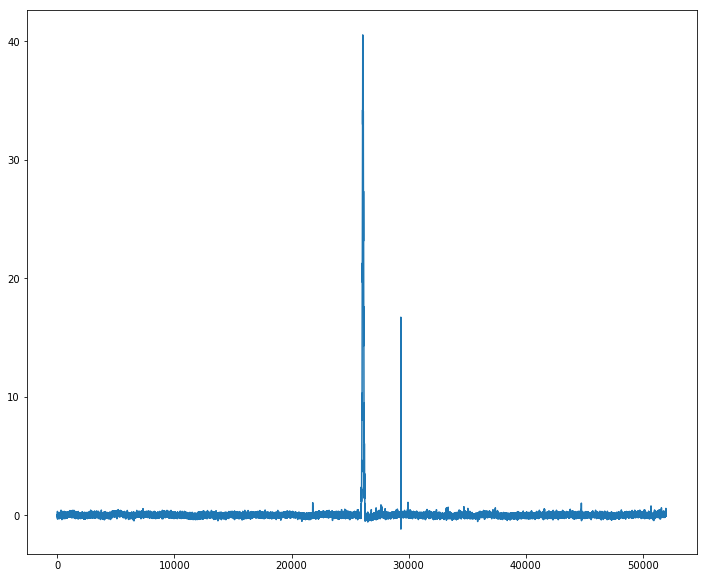

46


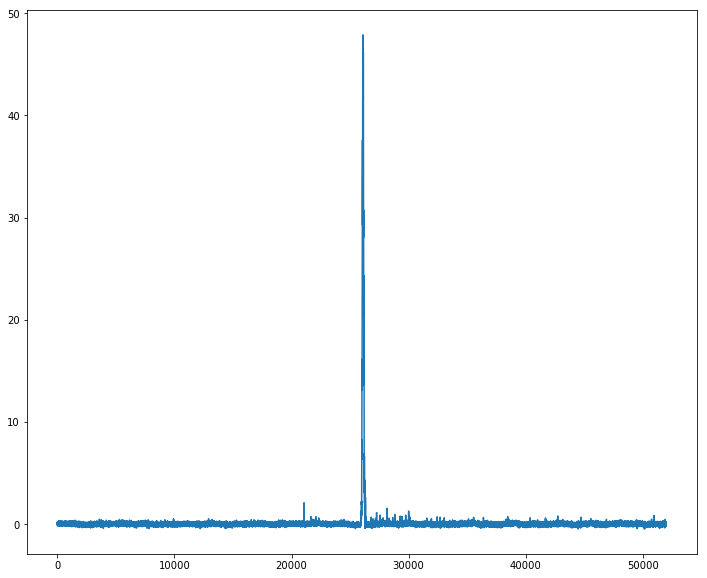

47


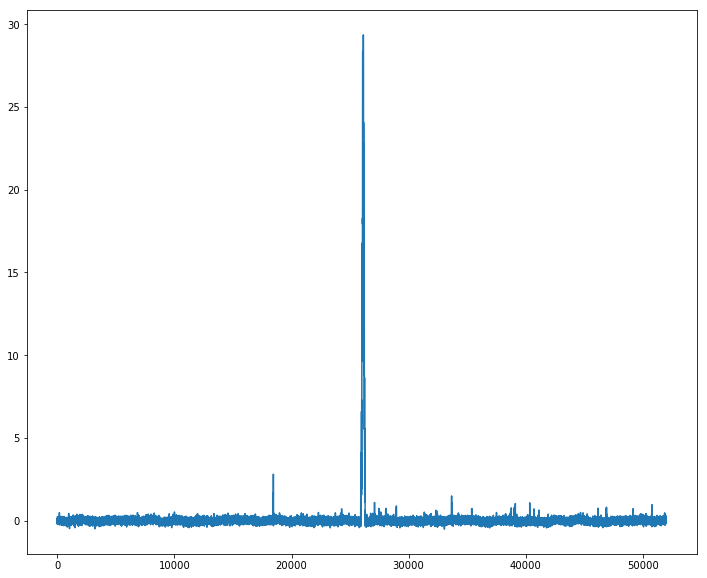

48


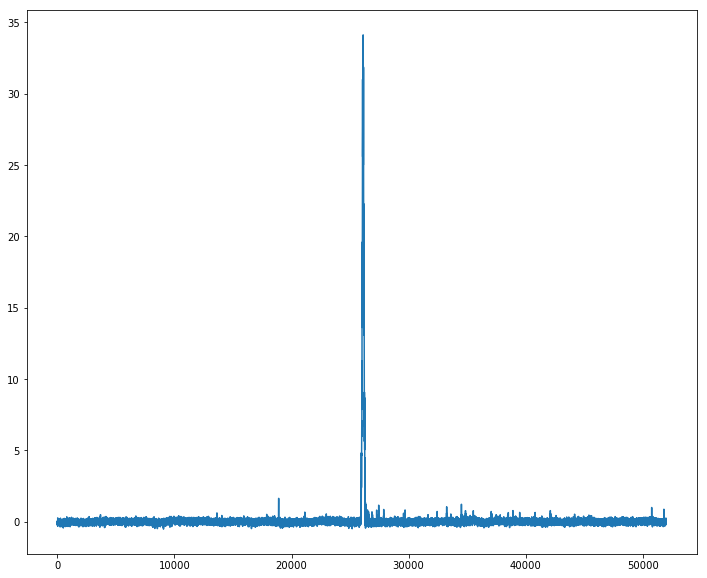

49


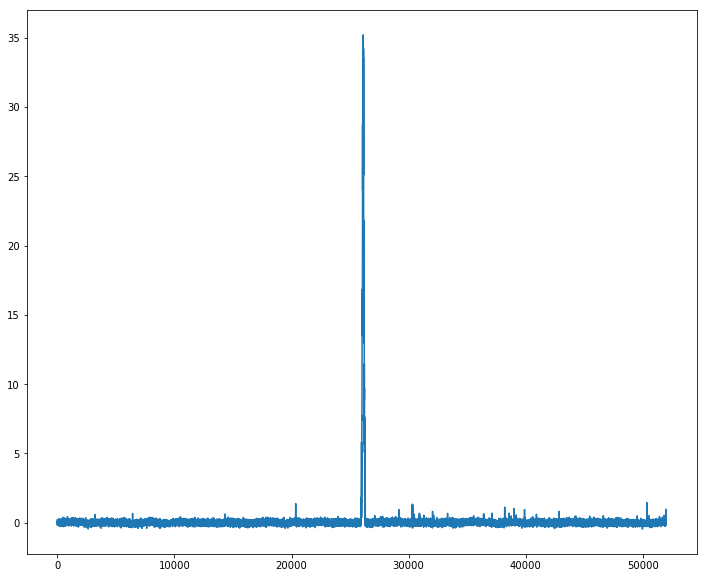

In [35]:
for evt in range(50):
    cwf = BLR.deconv_pmt(rwf[evt],
                         DataPMT.coeff_c.values,
                         DataPMT.coeff_blr.values,
                         list(range(11)),
                         38000,
                         5)
    swf = cpf.calibrated_pmt_sum(cwf,
                                 np.abs(DataPMT.adc_to_pes.values),
                                 list(range(11)),
                                 100,
                                 3)[0]
    print(evt)
    plt.plot(swf)
    plt.show()